In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img_path = '/home/zephyr/Desktop/Newcastle_University/11_FP_D/Dataset/Dataset/2.validation/2.validation/mask/34.png'
bg_path = '/home/zephyr/Desktop/Newcastle_University/11_FP_D/Dataset/Dataset/2.validation/2.validation/background-mask/34.png'

In [3]:
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
background = cv2.cvtColor(cv2.imread(bg_path), cv2.COLOR_BGR2GRAY)

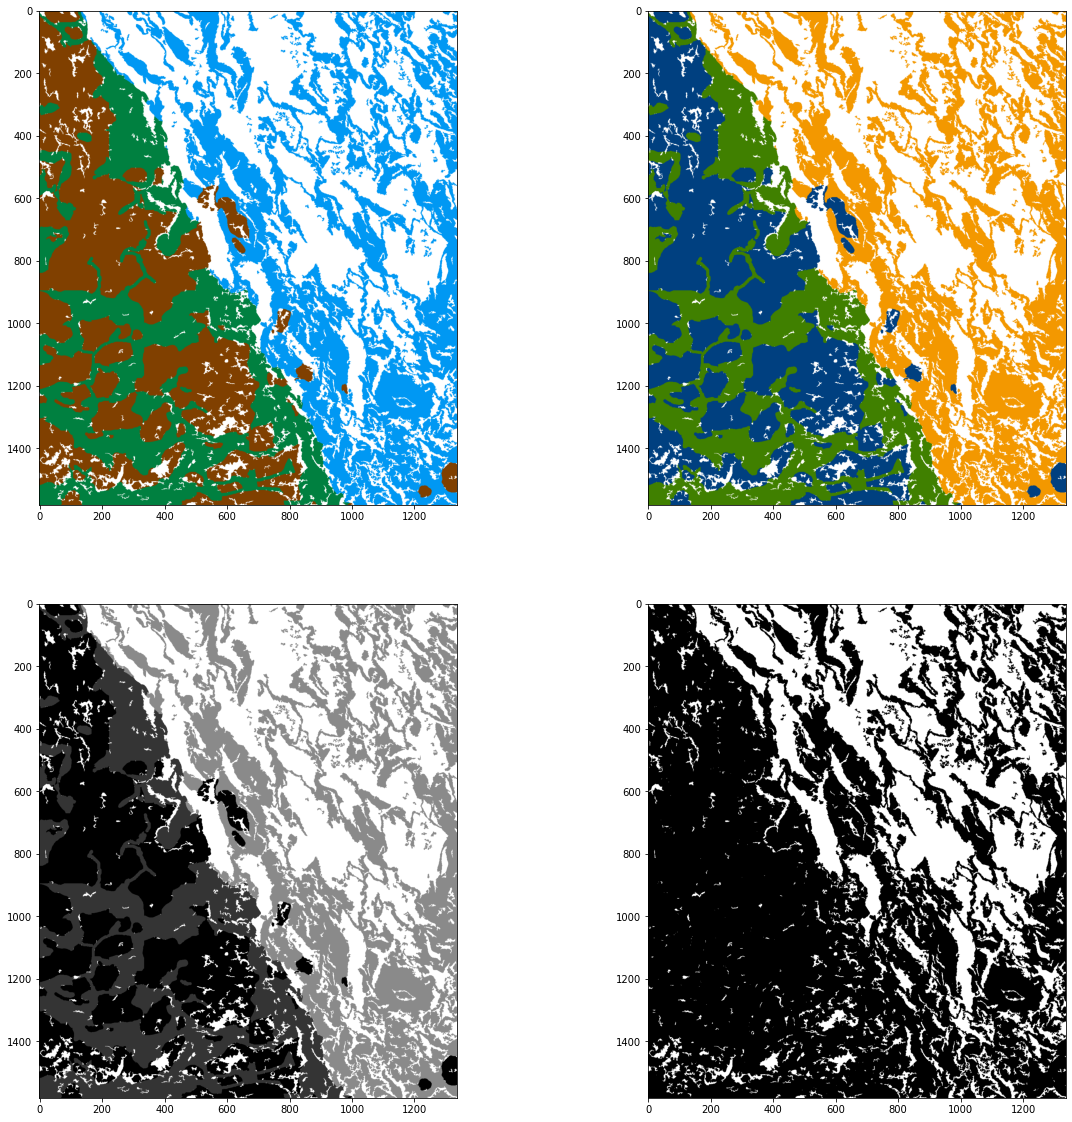

In [4]:
fig = plt.figure(figsize=(20, 20))

ax = fig.add_subplot(221)
plt.imshow(img)

ax = fig.add_subplot(222)
plt.imshow(img_rgb)

ax = fig.add_subplot(223)
plt.imshow(gray, cmap='gray')

ax = fig.add_subplot(224)
plt.imshow(background, cmap='gray')


In [22]:
tumor = (gray == 52).astype(np.uint8)
stroma = (gray == 94).astype(np.uint8)
normal = (gray == 162).astype(np.uint8)
bg = (background/255).astype(np.uint8)

In [6]:
bg.shape

(1582, 1336)

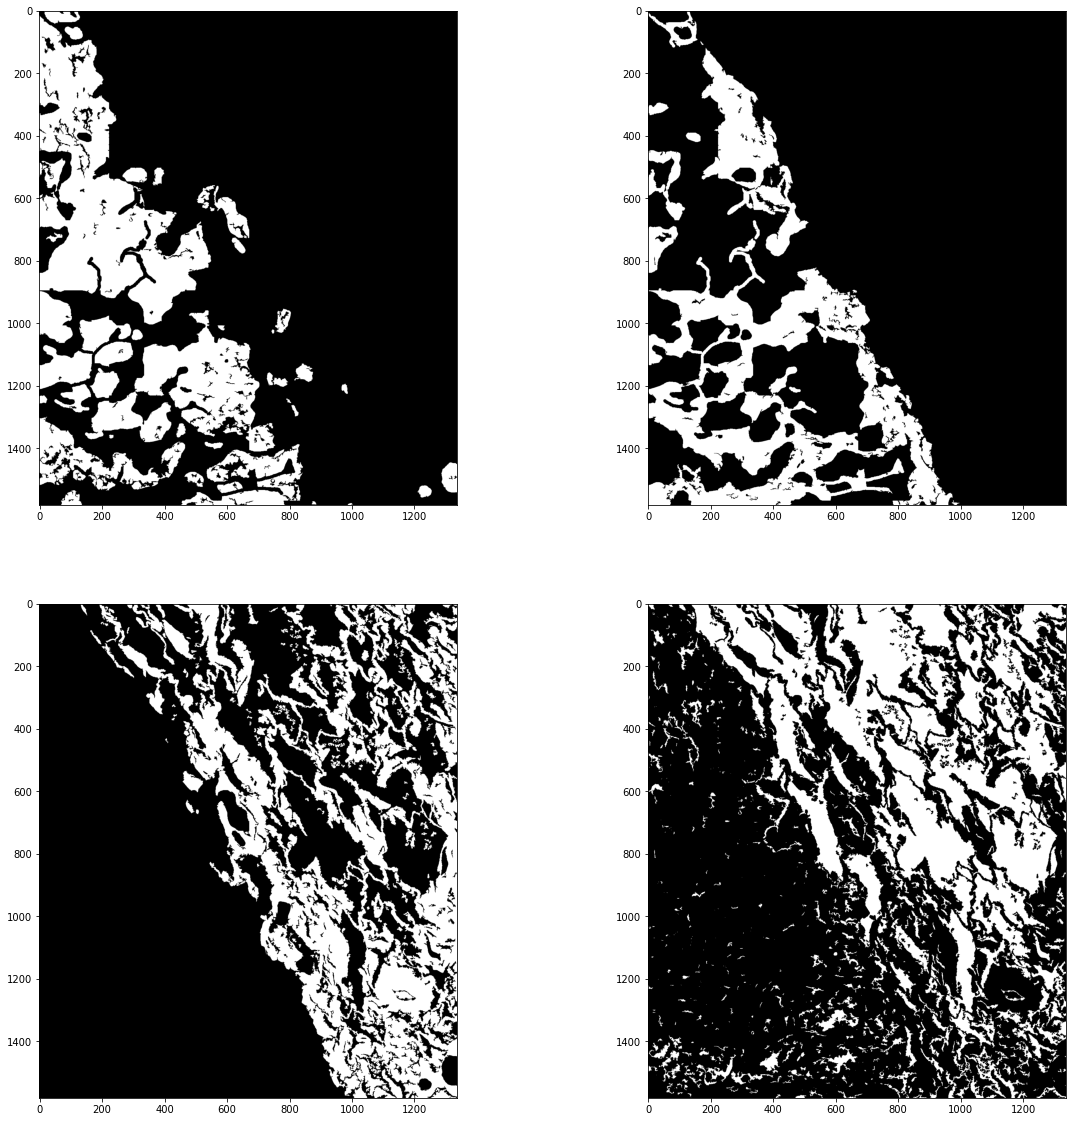

In [7]:
fig = plt.figure(figsize=(20, 20))

ax = fig.add_subplot(221)
plt.imshow(tumor, cmap='gray')

ax = fig.add_subplot(222)
plt.imshow(stroma, cmap='gray')

ax = fig.add_subplot(223)
plt.imshow(normal, cmap='gray')

ax = fig.add_subplot(224)
plt.imshow(bg, cmap='gray')


In [23]:
print(tumor.shape, stroma.shape, normal.shape, bg.shape)

print(np.ptp(tumor), np.ptp(stroma), np.ptp(normal), np.ptp(bg))

print(np.unique(tumor), np.unique(stroma), np.unique(normal), np.unique(bg))

(1582, 1336) (1582, 1336) (1582, 1336) (1582, 1336)
1 1 1 1
[0 1] [0 1] [0 1] [0 1]


In [24]:
tumor = tumor.reshape(tumor.shape[0], tumor.shape[1], 1)
stroma = stroma.reshape(stroma.shape[0], stroma.shape[1], 1)
normal = normal.reshape(normal.shape[0], normal.shape[1], 1)
bg = bg.reshape(bg.shape[0], bg.shape[1], 1)

In [25]:
print(tumor.shape, stroma.shape, normal.shape, bg.shape)

(1582, 1336, 1) (1582, 1336, 1) (1582, 1336, 1) (1582, 1336, 1)


In [26]:
x = np.concatenate((tumor, stroma, normal, bg), axis=2)
x.shape

(1582, 1336, 4)

In [31]:
y = cv2.resize(x, (256, 256))

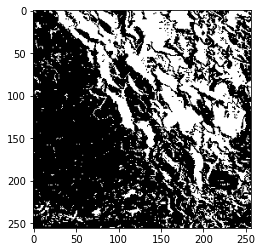

In [35]:
plt.imshow(y[:, :, 3], cmap='gray')

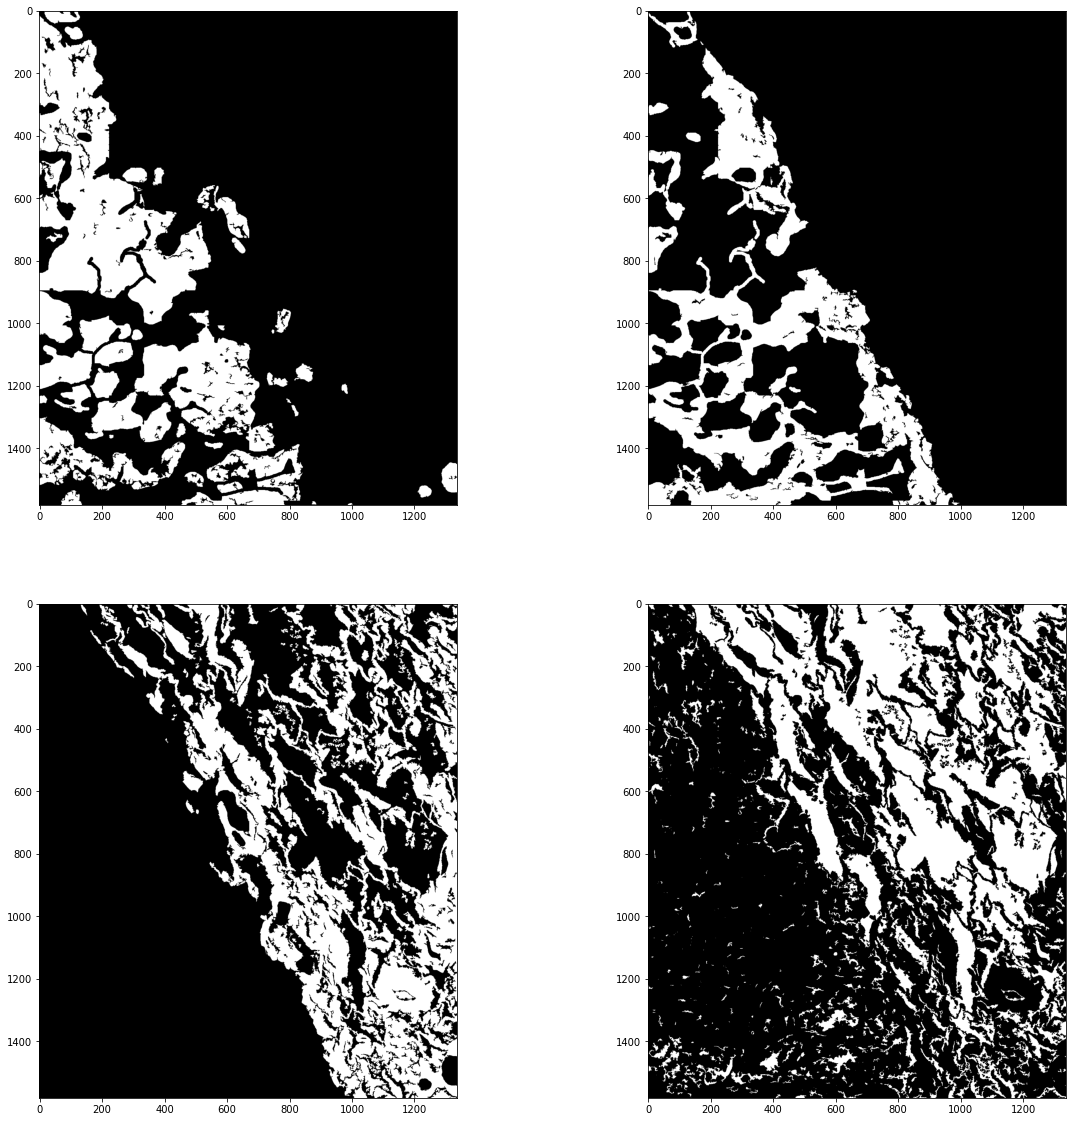

In [27]:
fig = plt.figure(figsize=(20, 20))

ax = fig.add_subplot(221)
plt.imshow(x[:, :, 0], cmap='gray')

ax = fig.add_subplot(222)
plt.imshow(x[:, :, 1], cmap='gray')

ax = fig.add_subplot(223)
plt.imshow(x[:, :, 2], cmap='gray')

ax = fig.add_subplot(224)
plt.imshow(x[:, :, 3], cmap='gray')

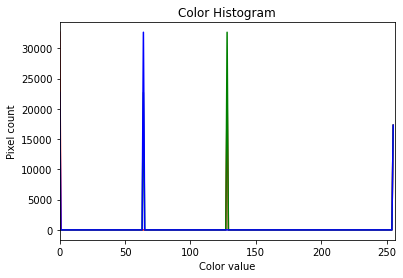

In [28]:
colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)

# create the histogram plot, with three lines, one for
# each color
plt.figure()
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        img[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.title("Color Histogram")
plt.xlabel("Color value")
plt.ylabel("Pixel count")

plt.show()

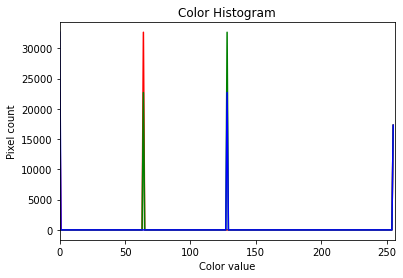

In [29]:
colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)

# create the histogram plot, with three lines, one for
# each color
plt.figure()
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        img_rgb[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.title("Color Histogram")
plt.xlabel("Color value")
plt.ylabel("Pixel count")

plt.show()

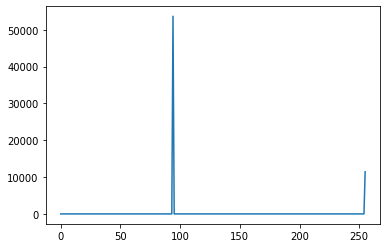

In [60]:
histogram, bin_edges = np.histogram(gray, bins=256, range=(0, 256))
plt.plot(bin_edges[0:-1], histogram)

In [61]:
np.nonzero(histogram)

(array([ 94, 255]),)

In [35]:
np.bincount(gray.ravel())

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0, 53660,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [24]:
len(gray.ravel())

2113552